# Libraries

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Functions

In [2]:
# Define AIMD (Additive Increase Multiplicative Decrease) function
def AIMD(alpha, beta, initialCwnd, maxRTT, packetsLost, maxCwnd,aFunc='',bFunc=''):
    cwnd = initialCwnd  # Starting congestion window size
    RTT_tracker = [cwnd]  # Track cwnd size over each RTT
    # Loop through each RTT, simulating the cwnd adjustment
    for i in range(1, maxRTT + 1):
        # Check for packet loss or if maxCwnd is reached
        if i in packetsLost or cwnd >= maxCwnd:
            if bFunc == 'log':
                newBeta = 1 - (1 / math.log(cwnd + 10))
                cwnd = max(1, cwnd * newBeta)
                cwnd = math.floor(cwnd)
            else:
                # Apply multiplicative decrease
                cwnd = max(1, cwnd * beta)
                cwnd = math.floor(cwnd)
        else:
            if aFunc == 'exp':
                exponent = 1/3
                newAlpha = alpha/math.pow(cwnd, exponent)
                cwnd = cwnd + newAlpha                
            else:
                # Apply additive increase
                cwnd = cwnd + alpha
        RTT_tracker.append(cwnd)
    return RTT_tracker

# Function to configure when packets are lost based on frequency
def configPacketsLost(maxRTT, packetsLostFreq):
    packetsLost = [i for i in range(1, maxRTT + 1) if i % packetsLostFreq == 0]
    return packetsLost

# Generate users with unique initial CWND values
def generate_users(num_users, initial_cwnd_range, alpha, beta):
    users = []
    possible_cwnds = np.arange(initial_cwnd_range[0], initial_cwnd_range[1] + 1)
    initial_cwnd_values = np.random.choice(possible_cwnds, size=num_users, replace=False)

    for i, initial_cwnd in enumerate(initial_cwnd_values, 1):
        users.append({'id': i, 'initial_cwnd': initial_cwnd, 'alpha': alpha, 'beta': beta})
        print("user", i, "initial cwnd:", initial_cwnd)
    return users

# Track RTT changes for all users
def trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd, aFunc='',bFunc=''):
    users_data = []
    for user in users:
        RTT_tracker = AIMD(user['alpha'], user['beta'], user['initial_cwnd'], maxRTT, packetsLost, maxCwnd,aFunc,bFunc)
        users_data.append({'id': user['id'], 'RTT_tracker': RTT_tracker})
    return users_data

# Plot CWND changes over RTT for all users
def simulation_plot(users_data, maxRTT):
    plt.figure(figsize=(6, 3))
    for user_data in users_data:
        plt.plot(range(1, maxRTT + 2), user_data['RTT_tracker'], label=f"User {user_data['id']}")
    plt.xlabel("RTT")
    plt.ylabel("CWND")
    plt.title("RTT vs CWND for Multiple Users")
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot CWND changes over RTT for selected users
def simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids):
    plt.figure(figsize=(6, 3))
    for user_data in users_data:
        if user_data['id'] in selected_user_ids:
            plt.plot(range(1, maxRTT + 2), user_data['RTT_tracker'], label=f"User {user_data['id']}")
    plt.xlabel("RTT")
    plt.ylabel("CWND")
    plt.title("RTT vs CWND for Selected Users")
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Initial Setup

In [3]:
# Fix random state for reproducibility
np.random.seed(0)
# Initialize simulation parameters
maxCwnd = 200
maxRTT = 200
num_users = 10  # Number of users
initialCwndRange = (1, 100)
alpha, beta = 1, 0.5  # AIMD parameters
packetsLostFreq = 10  # Frequency of packet loss
packetsLost = configPacketsLost(maxRTT, packetsLostFreq)  # Configure packet loss

# Generate user configurations
users = generate_users(num_users, initialCwndRange, alpha, beta)

user 1 initial cwnd: 27
user 2 initial cwnd: 87
user 3 initial cwnd: 3
user 4 initial cwnd: 56
user 5 initial cwnd: 76
user 6 initial cwnd: 94
user 7 initial cwnd: 17
user 8 initial cwnd: 74
user 9 initial cwnd: 55
user 10 initial cwnd: 96


# Same alpha and beta
## 2 users

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


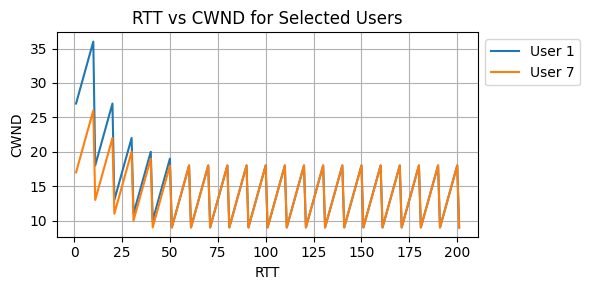

In [4]:
# Track CWND changes for all users
users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd)

selected_user_ids = [1,7] # Select specific users for visualization

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)

The graph above shows two users converge at around 50th RTT. The CWND remains relatively stable afterwards.

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


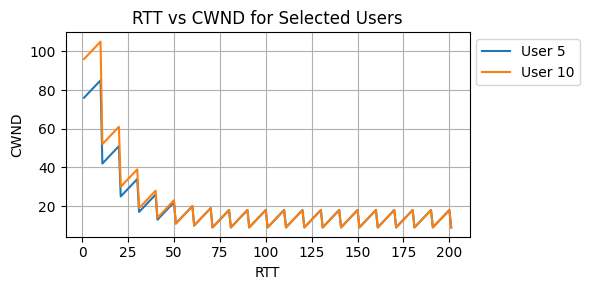

In [5]:
users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd)

selected_user_ids = [5,10]

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)

The graph above shows two users converge at around 70th RTT. The CWND remains relatively stable afterwards.

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


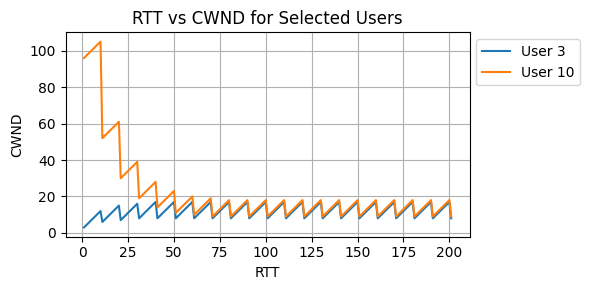

In [6]:
users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd)

selected_user_ids = [3,10]

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)

The graph above shows two users converge at around 60th RTT. The CWND remains relatively stable afterwards.

# Comparision:

After comparing the graphs above, it can be seen that higher initial CWND for both users results in later convergence. it is also intresting to see that large difference between initial CWND of the two users did not really affect the convergence speed.

## Multiple users

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


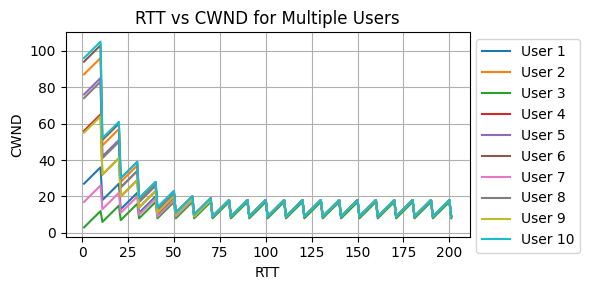

In [7]:
packetsLostFreq = 10
packetsLost = configPacketsLost(maxRTT,packetsLostFreq)

users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd)

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation
simulation_plot(users_data, maxRTT)

The graph above with a packets loss occur at every 10 RTT converges at around 70th RTT. The CWND remains relatively stable afterwards.

Packets lost frequency: 20
Multiplicative-decrease at RTT: [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]


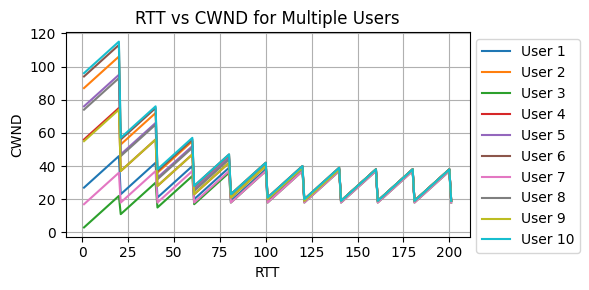

In [8]:
packetsLostFreq = 20
packetsLost = configPacketsLost(maxRTT,packetsLostFreq)

users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd)

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation
simulation_plot(users_data, maxRTT)

The graph above with a packets loss occur at every 20 RTT converges at around 120th RTT. The CWND remains relatively stable afterwards.

### Conclusion:
After comparing the graphs of 2 users and multiple users with the same frequency of packet loss, it can be concluded that the convergence of the CWND is mainly affected by high initial CWND. However, mores user will results in more CWND with different initial points which will be more likely to create high CWND which delays the Convergence speed.<br>

After comparing the graphs of multiple users with different frequency of packet loss, it can be concluded that more frequent packet loss leads to earlier convergence of the CWND. By adjusting the CWND more often in response to the network conditions, indicating a more aggressive congestion control strategy.

# Different alpha and beta

### Different alpha value

4
Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


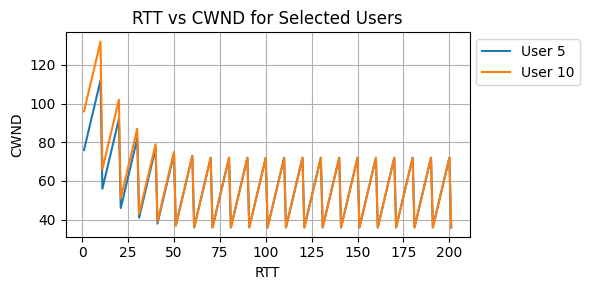

In [9]:
maxCwnd = 200
maxRTT = 200
packetsLostFreq = 10
packetsLost = configPacketsLost(maxRTT,packetsLostFreq)

# Track CWND changes for all users
selected_users=[]
selected_users.append(users[4].copy())
selected_users.append(users[9].copy())


selected_users[0]['alpha'] = 4
selected_users[1]['alpha'] = 4
print(selected_users[0]['alpha'])
users_data = trackAllUsersRTT(selected_users, maxRTT, packetsLost, maxCwnd)

selected_user_ids = [5,10] # Select specific users for visualization

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


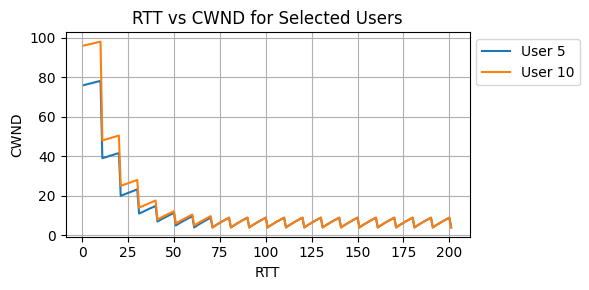

In [10]:
aFunc= 'exp'
bFunc=''
users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd,aFunc,bFunc)

selected_user_ids = [5,10]

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


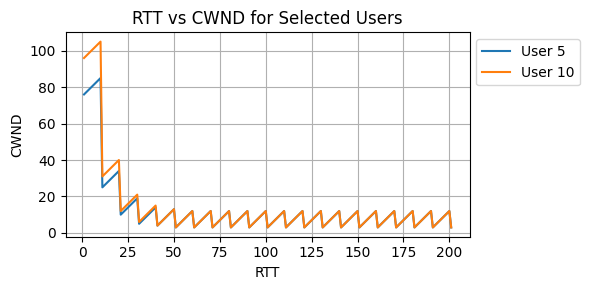

In [11]:
packetsLostFreq = 10
packetsLost = configPacketsLost(maxRTT,packetsLostFreq)

# Track CWND changes for all users
selected_users=[]
selected_users.append(users[4].copy())
selected_users.append(users[9].copy())

selected_users[0]['beta'] = 0.3
selected_users[1]['beta'] = 0.3

users_data = trackAllUsersRTT(selected_users, maxRTT, packetsLost, maxCwnd)

selected_user_ids = [5,10] # Select specific users for visualization

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)

### Different beta value

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


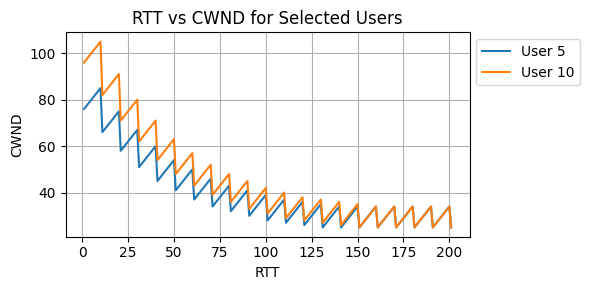

In [12]:
aFunc= ''
bFunc='log'
users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd,aFunc,bFunc)

selected_user_ids = [5,10]

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)

Packets lost frequency: 10
Multiplicative-decrease at RTT: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


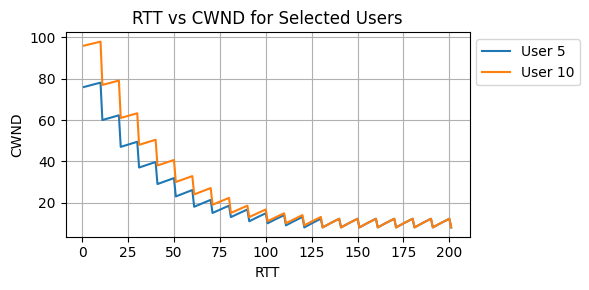

In [13]:
aFunc= 'exp'
bFunc='log'
users_data = trackAllUsersRTT(users, maxRTT, packetsLost, maxCwnd,aFunc,bFunc)

selected_user_ids = [5,10]

print("Packets lost frequency:",packetsLostFreq)
print("Multiplicative-decrease at RTT:",packetsLost)

# Visualize the simulation for only the selected users
simulation_plot_for_selected_users(users_data, maxRTT, selected_user_ids)